In [1]:
import matplotlib.pylab as plt
import numpy as np
from scipy import stats
import csv
from scipy import signal
import os.path 
from os import listdir
from os.path import isfile, join

In [2]:
#Funcion que hace una lista de los archivos de una carpeta
def ls(ruta = '.'):
    return [arch for arch in listdir(ruta) if isfile(join(ruta, arch))]
#correr ls('.')

In [3]:
lista_archivo = ls('.')

In [4]:
def picosy(t,ym,nprc,n):
    #Cuentas para hallar la velocidad del Ym
    peakind = signal.find_peaks_cwt(ym, np.arange(1,10),noise_perc=nprc)
    tpicos=[]
    ypicos=[]
    for j in peakind:
        tpicos.append(t[j])
        ypicos.append(ym[j])
    
    yperiod = []
    for i in range(len(tpicos[tpicos.index(max(tpicos))-n:-1])):
        yperiod.append(tpicos[tpicos.index(max(tpicos))-n+i+1]-tpicos[tpicos.index(max(tpicos))-n+i])
    return tpicos, ypicos, np.mean(yperiod)

In [5]:
def picosang(t,Ang,nprc,n):
    peakind_Ang = signal.find_peaks_cwt(Ang, np.arange(1,10),noise_perc=nprc)
    Ang_tpicos=[]
    Ang_picos=[]
    for j in peakind_Ang:
        Ang_tpicos.append(t[j])
        Ang_picos.append(Ang[j])

    Periodo_Ang = []
    for i in range(len(Ang_tpicos[Ang_tpicos.index(max(Ang_tpicos))-n:-1])-2):
        Periodo_Ang.append(Ang_tpicos[Ang_tpicos.index(max(Ang_tpicos))-n+i+1]-Ang_tpicos[Ang_tpicos.index(max(Ang_tpicos))-n+i])
    return Ang_tpicos, Ang_picos, np.mean(Periodo_Ang)

In [6]:
def analisis_de_cilindros(lista_archivo,archivo,fps,cosa):
    
    with open(archivo, 'rt') as f:
        reader = csv.reader(f)
        data = list(reader)
        for row in reader:
            print(row)
    
    a, b, n = cosa[0], cosa[1], cosa[2]
    
    Lt, Lc, Dc, DM, Dm = float(archivo[9:11]+'.'+archivo[12:13]), float(archivo[19:21]+'.'+archivo[22:23]), float(archivo[27:28]+'.'+archivo[29:31]), float(archivo[34:35]+'.'+archivo[36:38]), float(archivo[41:42]+'.'+archivo[43:45])

    tiempo = []
    Xm = []
    Ym = []
    Ang = []
    for i in data[1:]:
        tiempo.append(float(i[0])/fps)
        Xm.append(float(i[1]))
        Ym.append(float(i[2]))
        Ang.append(float(i[5]))
              
    #Correccion
    tiempo = tiempo[a:b] 
    Xm = Xm[a:b]
    Ym = Ym[a:b]
    Ang = Ang[a:b]
    
    #Calculo de la velocidad de sedimentacion del cilindro al descender verticalmente por la celda (vel de x centro de masa)          
    gradient, intercept, r_value, p_value, std_err = stats.linregress(tiempo,Xm)    

    filty = savgol_filter(Ym, 51, 3)
    tpicos, ypicos, Periodo_de_Y = picosy(tiempo,filty,10,n)
    for i in range(len(tpicos)):
        ypicos[i]=Ym[tpicos.index(tpicos[i])]

    filtang = savgol_filter(Ang, 51, 3)
    Ang_tpicos, Ang_picos, T_Ang = picosang(tiempo,filtang,10,n)
    for i in range(len(Ang_tpicos)):
        Ang_picos[i]=Ang[Ang_tpicos.index(Ang_tpicos[i])]
    
    plt.figure(lista_archivo.index(archivo),figsize=(15,5))
    plt.subplot(1,3,1)
    plt.plot(tiempo,Ym,label = 'L = '+str(Lc)+', D = '+str(Dc))
    plt.plot(tpicos[tpicos.index(max(tpicos))-n:-1],ypicos[tpicos.index(max(tpicos))-n:-1],'r*')
    plt.grid(b=True, which='major')
    plt.subplot(1,3,2)
    plt.plot(tiempo,Ang,label = 'L = '+str(Lc)+', D = '+str(Dc))
    plt.plot(Ang_tpicos[Ang_tpicos.index(max(Ang_tpicos))-n:-1],Ang_picos[Ang_tpicos.index(max(Ang_tpicos))-n:-1],'r*')
    plt.grid(b=True, which='major')
    plt.subplot(1,3,3)
    plt.plot(tiempo,Xm,label = 'L = '+str(Lc)+', D = '+str(Dc))
    plt.grid(b=True, which='major')
    plt.legend()
    
    #ERRORES
    #tiempo
#     errT = 1/fps
    
#     T4 = 0
#     T12 = 0
#     for i in yperiod:
#         T4 = i**(-4)+T4
#     for i in range(len(yperiod)-1):
#         T12 = -2/((yperiod[i]*yperiod[i+1])**2) + T12
#     errfy = (1/fps)*np.sqrt((T4+T12)/len(yperiod)) 
    
#     T4 = 0
#     T12 = 0
#     for i in Periodo_Ang:
#         T4 = i**(-4)+T4
#     for i in range(len(Periodo_Ang)-1):
#         T12 = -2/(Periodo_Ang[i]*Periodo_Ang[i+1]) + T12
#     errfa = (1/fps)*np.sqrt((T4+T12)/len(Periodo_Ang)) 
    
    return Lc, Dc, gradient, Periodo_de_Y, T_Ang  
#     return L, D, gradient, std_err, Periodo_de_Y, errfy, T_Ang, errfa      

In [7]:
with open(lista_archivo[2], 'rt') as f:
        reader = csv.reader(f)
        data = list(reader)
        for row in reader:
            print(row)
len(data)
data[1].index('1')


0

In [8]:
L, D, Vcm, Ty, TAng = analisis_de_cilindros(lista_archivo,lista_archivo[7],49.9,[0,300,12])

NameError: name 'savgol_filter' is not defined

In [8]:
def picosy(t,ym,nprc):
    #Cuentas para hallar la velocidad del Ym
    peakind = signal.find_peaks_cwt(ym, np.arange(1,10),noise_perc=nprc)
    tpicos=[]
    ypicos=[]
    for j in peakind:
        tpicos.append(t[j])
        ypicos.append(ym[j])
    
    yperiod = []
    for i in range(len(tpicos[tpicos.index(max(tpicos)):-1])):
        yperiod.append(tpicos[tpicos.index(max(tpicos))+i+1]-tpicos[tpicos.index(max(tpicos))+i])
    return tpicos, ypicos, np.mean(yperiod)

In [9]:
from scipy.signal import savgol_filter
def determine_lambda_flat(dset):
    matriz = dset[:,:]
    matriz_flat= matriz.flatten()
    z= hilbert(matriz_flat)
    inst_phase = np.unwrap(np.angle(z))
    regenerated_carrier = np.cos(inst_phase)
    yhat = savgol_filter(regenerated_carrier, 51, 3)
    peaks, _ = find_peaks(yhat, height=0)
    x_yhat = np.linspace(0,x_final_flat,len(yhat))
    maxs = x_yhat[peaks]
    difs = np.diff(maxs)
    long_de_onda=np.mean(difs)
    std_long_de_onda=np.std(difs)
    return long_de_onda, std_long_de_onda

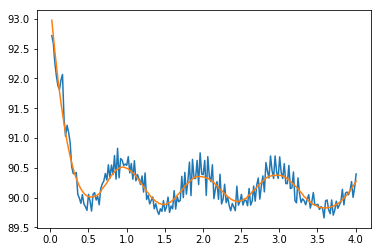

In [10]:
tiempo = []
fps=49.9
Xm = []
Ym = []
Ang = []
for i in data[1:]:
    tiempo.append(float(i[0])/fps)
    Xm.append(float(i[1]))
    Ym.append(float(i[2]))
    Ang.append(float(i[5]))
filt = savgol_filter(Ang[:200], 51, 3)
plt.plot(tiempo[:200],Ang[:200])
plt.plot(tiempo[:200],filt)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


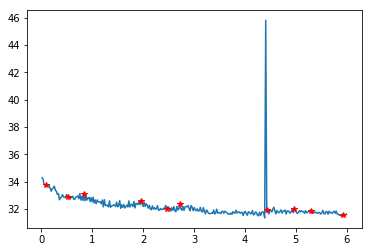

In [11]:
tiempo = []
fps=49.9
Xm = []
Ym = []
Ang = []
for i in data[1:300]:
    tiempo.append(float(i[0])/fps)
    Xm.append(float(i[1]))
    Ym.append(float(i[2]))
    Ang.append(float(i[5]))
r1, r2, ty = picosy(tiempo,Ym,100)

plt.plot(tiempo,Ym)

plt.plot(r1,r2,'*r')